In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Функции инициализации центроидов

In [46]:
def rand_u_init(data, k):
    # just random initialization
    # suppose data - np.array
    return np.random.rand(k, data.shape[1]) * np.amax(data);

In [90]:
def distinct_points_init(data, k):
    # a <= x <= b 
    # c <= y <= d
    a, b = np.min(data[:, 0]), np.max(data[:, 0])
    c, d = np.min(data[:, 1]), np.max(data[:, 1])
    w = int(np.ceil(np.sqrt(k)))
    x = np.tile(np.linspace(a, b, w), w)
    y = np.tile(np.linspace(c, d, w), w)
    res = np.concatenate((x[:k, np.newaxis], y[:k, np.newaxis]), axis = 1)
    return res

# K-means model

In [103]:
class KMeans:
    '''
    K-means divide points onto k clasters,
    where interclaster distance is minimized
    
    init:
    k - number of clasters
    u_init(data, k) - function, that initialize centroids
                      rand_u_init by default
                      
    fit:
    data - 2d array, points to clasterize
    t - number of iterations
    '''
    def __init__(self, k, u_init=rand_u_init):
        self.k = k # number of clasters
        self.u_init = u_init
        self.hist = []
        
    def fit(self, data, t=100):
        # suppose data is np.array
        # length - number of points
        # n - number of dimensions
        length, n = data.shape
        u = self.u_init(data, self.k)
        self.hist = []
        for i in range(t):
            # calculate claster using centroids
            c = {i : [] for i in range(self.k)}
            loss = 0
            for p in range(length):
                x = data[p]
                dist = np.sum(np.power(x - u, 2), axis=1)
                nearest_u = np.argmin(dist)
                loss += np.min(dist)
                c[nearest_u].append(x)
            # recalculate centroids
            for i in range(self.k):
                l = len(c[i])
                if l == 0:
                    continue
                u[i] = sum(c[i]) / l
        # return centroids and clasters
        return (u, c)

# Testing

3 кучи с нормальным распределением, небольшой дисбаланс

In [104]:
x1 = np.random.normal(size=(50, 2))*3
x2 = np.random.normal(size=(100, 2))*2 + 10
x3 = np.random.normal(size=(200, 2)) + 15
x = np.concatenate((x1, x2, x3))
x.shape

(350, 2)

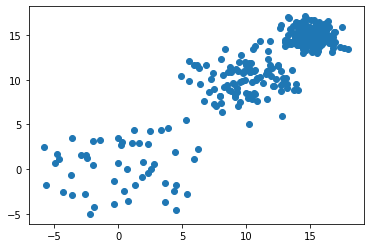

In [105]:
plt.scatter(x[:, 0],x[:, 1])

случайный инициализатор

In [106]:
model = KMeans(3)
c = model.fit(x)

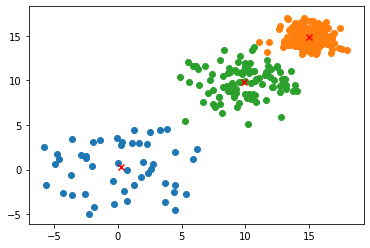

In [107]:
res = [np.array(i) for i in c[1].values()]
for i, claster in enumerate(res):
    plt.scatter(claster[:,0],claster[:,1])
for i in range(3):
    plt.scatter(c[0][i,0], c[0][i, 1], marker='x', color='red')

In [108]:
distinct_points_init(x, 3)

array([[-5.7686344 , -4.96271478],
       [17.95847601, 17.06081717],
       [-5.7686344 , -4.96271478]])

k достаточно удалённых точек

In [109]:
model = KMeans(3, distinct_points_init)
c = model.fit(x)

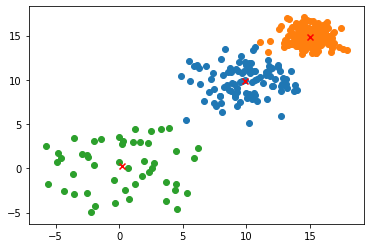

In [110]:
res = [np.array(i) for i in c[1].values()]
for i, claster in enumerate(res):
    plt.scatter(claster[:,0],claster[:,1])
for i in range(3):
    plt.scatter(c[0][i,0], c[0][i, 1], marker='x', color='red')

Плохие данные